<a href="https://colab.research.google.com/github/ChickenRob0t/Clasificador_Celeste/blob/main/Clasificador_Objetos_celestes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas 

!pip install numpy
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=541635428bf589bf5aadf5958e2c5f8d635c49790ba85435551c4eef8701ad8d
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



Exploración de datos

In [ ]:
Data=pd.read_csv("/content/drive/MyDrive/Data/Skyserver.csv")
rows=len(Data)
cols=len(Data.columns)
print(Data.isna().sum().sum()) #No hay NaN's, al parecer no va a necesitar limpieza de datos
Data.describe()

0


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
Data['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [ ]:
#Reasignación de categorías a valores numéricos

Data['class'].unique()
rip={'STAR': 0, 'GALAXY': 1, 'QSO': 2}
Data['class_n']=Data['class'].replace(rip)
Data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,class_n
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,0
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246,1
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228,1
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622,0
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229,1


In [ ]:
Data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [ ]:
#Creamos un dataframe con las variables que nos interesan, en este caso los filtros y el valor del corrimiento al rojo
feat=['u','g','r','i','z','redshift']
Data_f=Data[feat]


In [ ]:

#Vamos a crear la diferencia entre los valores de los filtros el 'color'
colors=['u','g','r','i','z']
comb=list(itertools.combinations(colors,2))

for i in range(len(comb)):
  name=comb[i][0]+ '-' + comb[i][1]
  Data_f[name]=Data_f[comb[i][0]]-Data_f[comb[i][1]]





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#Metemos las clasificaciones numéricas en el nuevo DF
Data_f['class_n']=Data['class_n']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
 #Matriz de correlaciones, para darme una idea qué tanto podrían tener que ver las variables con la categoría
Data_f.corr()

,u,g,r,i,z,redshift,u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z,class_n
u,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741,0.051499,0.115213,0.152468,0.162331,0.201628,0.235154,0.238921,0.209199,0.242643,0.105077,0.284541
g,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576,-0.483585,-0.411698,-0.360507,-0.348642,-0.245873,-0.185618,-0.193526,-0.053364,-0.113120,-0.095263,0.357352
r,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080,-0.664364,-0.636958,-0.588490,-0.582380,-0.513193,-0.431006,-0.446175,-0.198310,-0.315030,-0.213229,0.278678
i,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450,-0.717272,-0.702108,-0.696809,-0.670056,-0.589520,-0.581358,-0.553716,-0.399847,-0.438825,-0.167500,0.205367
z,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034,-0.749486,-0.745087,-0.719876,-0.733599,-0.644133,-0.591935,-0.636910,-0.350555,-0.539074,-0.353126,0.149444
redshift,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000,-0.499439,-0.432294,-0.387160,-0.368185,-0.271383,-0.219711,-0.214016,-0.088491,-0.125625,-0.075168,0.621046
u-g,0.051499,-0.483585,-0.664364,-0.717272,-0.749486,-0.499439,1.000000,0.969656,0.934592,0.928501,0.799270,0.740883,0.762085,0.447718,0.616178,0.354362,-0.204196
u-r,0.115213,-0.411698,-0.636958,-0.702108,-0.745087,-0.432294,0.969656,1.000000,0.973078,0.975203,0.921938,0.844611,0.869520,0.496526,0.692948,0.405820,-0.079650
u-i,0.152468,-0.360507,-0.588490,-0.696809,-0.719876,-0.387160,0.934592,0.973078,1.000000,0.975733,0.911312,0.931338,0.900490,0.683217,0.761549,0.301883,0.001408
u-z,0.162331,-0.348642,-0.582380,-0.670056,-0.733599,-0.368185,0.928501,0.975203,0.975733,1.000000,0.926187,0.891755,0.948024,0.585089,0.835328,0.503306,0.055032


In [ ]:
#En la matriz de correlación no pareciera que fueran tan directas las relaciones, sin embargo la teoría indica que los colores funcionan mejor para la descripción
#Así que de seguro es que funcionan mejor en conjunto
Data_f.corr()['class_n'].sort_values()

u-g        -0.204196
u-r        -0.079650
u-i         0.001408
u-z         0.055032
g-r         0.127726
z           0.149444
i           0.205367
g-i         0.211696
i-z         0.234048
r-i         0.257656
g-z         0.270937
r           0.278678
u           0.284541
g           0.357352
r-z         0.377137
redshift    0.621046
class_n     1.000000
Name: class_n, dtype: float64

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
#Eliminamos la variable que nos da las clases para tomarlo como las variables y normalizamos el dataset
Data_filt=Data_f.drop(['class_n'],axis=1)

Data_filt=(Data_filt-Data_filt.min())/(Data_filt.max()-Data_filt.min())


In [ ]:
#Como puro interés, voy a ver qué pasa si sólo pongo las combinaciones entre filtros
Data_comb=Data_filt.iloc[:,5:16]

Data_comb

,redshift,u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z
0,0.000770,0.929256,0.943356,0.950158,0.883250,0.946456,0.948797,0.765076,0.743361,0.469748,0.137546
1,0.000762,0.673535,0.799987,0.858350,0.686647,0.875337,0.897700,0.641668,0.728870,0.412043,0.125973
2,0.023749,0.606696,0.792753,0.864586,0.717510,0.898217,0.921506,0.712111,0.740162,0.463321,0.138056
3,0.000751,0.599246,0.764417,0.838397,0.645852,0.863014,0.891114,0.626194,0.728399,0.408333,0.124705
4,0.000882,0.631542,0.718573,0.798155,0.553986,0.784297,0.833852,0.496072,0.711724,0.351349,0.115962
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.005920,0.647251,0.792194,0.856364,0.690700,0.877549,0.901607,0.659276,0.731406,0.428492,0.131082
9996,0.022753,0.513798,0.726396,0.826796,0.617277,0.852806,0.897487,0.631306,0.738656,0.424340,0.120836
9997,0.000697,0.551839,0.730475,0.815006,0.593826,0.839732,0.873810,0.583864,0.723136,0.387389,0.120509
9998,0.003388,0.549719,0.740887,0.824961,0.634121,0.855051,0.886559,0.635189,0.727826,0.426148,0.134008


**Función que regresa los datos  importantes**

In [ ]:
#Creamos el modelo, le entregamos los datos, las variables y el número de clusters que querramos y regresa la inercia de los grupos, además de la precisión del modelo
def Modelo_NS(Datos,variables,clusters):
  model = KMeans(n_clusters=clusters)
  model.fit(variables)
  k_m=pd.Series(model.labels_)
  Datos['k_m']=k_m
  
  inercia=model.inertia_
 
 #Esta parte es una matriz de confusión, sólo que la usamos para re-asignar los valores que entregó el modelo en comparación con los que asignamos al principio
 #Las filas las pondremos como los valores verdaderos y las columnas como la clasificó el algoritmo
  M=np.zeros((3,3))
  
  for i in range(3):
    for j in range(3):
      M[i][j]=len(Datos.loc[(Datos['class_n']==i )& (Datos['k_m']==j)])
 
 
  #Esto nos entrega cual es el valor de la categoría que nos dió en el algoritmo y a cual le corresponde de la asignación al principio (STAR:0, GALAXY: 1, QUASAR: 2)
  cero=list(M[0]).index(M[0].max())
  uno=list(M[1]).index(M[1].max())
  dos=list(M[2]).index(M[2].max())
  
  #Reemplazamos los valores para que coincidan
  rep={0:cero, 1:uno, 2:dos}
  Datos['k_m']=Datos['k_m'].replace(rep)


  #Esto lo pongo desde ahorita para que se pueda usar después en la entropía
  p_1=M[0][cero]/M[0].sum()
  p_2=M[1][uno]/M[1].sum()
  p_3=M[2][dos]/M[2].sum()


   
  y_true=Datos['class_n']
  y_pred=Datos['k_m']

  #Porcentaje de cuánto se equivocó el modelo
  k_ac=(Datos['class_n']==Datos['k_m']).sum()*100/10000

  #Aquí creo que hay un problema en la re-asignación de categorías de arriba, para saber que está funcionando correctamente la entrada de la diagonal deben de ser los valores más grandes
  M_2=np.zeros((3,3))
  for i in range(3):
    for j in range(3):
      M_2[i][j]=len(Datos.loc[(Datos['class_n']==i )& (Datos['k_m']==j)])
      
  
  


  return M,inercia, k_ac, p_1,p_2,p_3, M_2, [cero,uno,dos],y_true,y_pred



In [ ]:
A=Modelo_NS(Data,Data_comb,3)
print(A[0:8])
print(A[6])

#Aquí se observa que algo salió mal, para ciertas configuraciones [2,0,1],[0,2,1] no se clasifican bien
#Ahora que lo pienso, parece que cuando el cuasar no es clasificado con el 2 


(array([[ 589., 3356.,  207.],
       [2830., 2123.,   45.],
       [  14.,   53.,  783.]]), 137.53726878363022, 69.69, 0.8082851637764933, 0.5662264905962385, 0.9211764705882353, array([[3356.,  589.,  207.],
       [2123., 2830.,   45.],
       [  53.,   14.,  783.]]), [1, 0, 2])
[[3356.  589.  207.]
 [2123. 2830.   45.]
 [  53.   14.  783.]]


Gráficas de los resultados y Matriz de confusión

[0.32406545 0.49887702 0.14727474]


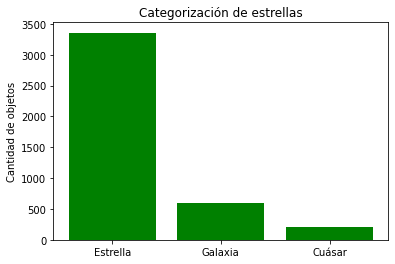

In [ ]:
plt.bar(['Estrella','Galaxia','Cuásar'],A[6][0],color='g')
plt.title('Categorización de estrellas')
plt.ylabel('Cantidad de objetos')
print(gini(A[6]))


Text(0, 0.5, 'Cantidad de objetos')

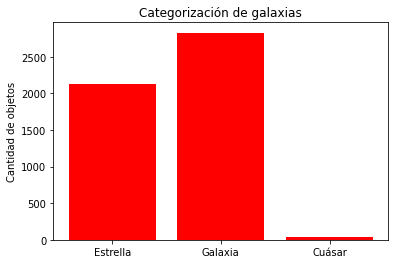

In [ ]:
plt.bar(['Estrella','Galaxia','Cuásar'],A[6][1],color='r')
plt.title('Categorización de galaxias')
plt.ylabel('Cantidad de objetos')


Text(0, 0.5, 'Cantidad de objetos')

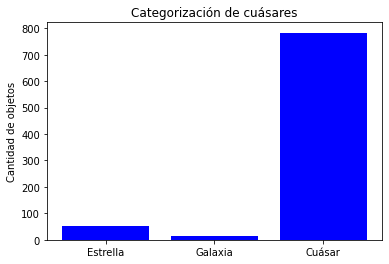

In [ ]:
plt.bar(['Estrella','Galaxia','Cuásar'],A[6][2],color='b')
plt.title('Categorización de cuásares')
plt.ylabel('Cantidad de objetos')

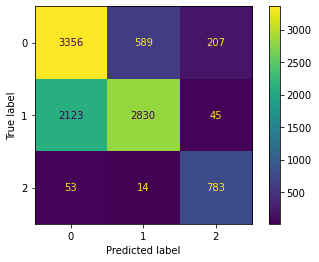

In [ ]:
cm=confusion_matrix(A[8],A[9])
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:

#Creamos una función que nos regrese la entropía de cada uno de los clústers y la total, se le aplica a la matriz de confusión
def entropy(M):
  entropy=np.zeros(3)
  for i in range(3):
    entropy[i]=-M[i].max()/M[i].sum() * np.log2(M[i].max()/M[i].sum())
  
  return entropy, entropy.sum()

def gini(M):
  gin=np.zeros(3)
  for i in range(3):
    gin[i]=1
    for j in range(3):
      gin[i]-=(M[i][j]/M[i].sum())**2
  return gin

#Ahora hacemos una función para que realice la función 'n' veces, y entregue el promedio, la desviación estándar y podría ser que la entropía de la información 


#Nota para mí, esto se podría ver mejor y quizás hasta optimizar si en lugar de hacer muchas listas, hacemos una matriz
def Est(num,Datos,variables,n_clus):
  acc=list(np.zeros(num))
  iner=list(np.zeros(num))
  ent_0=list(np.zeros(num))
  ent_1=list(np.zeros(num))
  ent_2=list(np.zeros(num))
  ent_tot=list(np.zeros(num))
  

  means=list(np.zeros(6))
  std=list(np.zeros(6))


  for i in range(num):
    Mod=Modelo_NS(Datos,variables,n_clus)
    acc[i]=Mod[2]
    iner[i]=Mod[1]
    #Aquí sacamos la entropía de todo el modelo usando la matriz de los clústers
    
    en=entropy(Mod[0])
    ent_0[i]=en[0][0]
    ent_1[i]=en[0][1]
    ent_2[i]=en[0][2]
    ent_tot[i]=en[1]

  means[0]=np.mean(acc)
  means[1]=np.mean(iner)
  means[2]=np.mean(ent_0)
  means[3]=np.mean(ent_1)
  means[4]=np.mean(ent_2)
  means[5]=np.mean(ent_tot)

  std[0]=np.std(acc)
  std[1]=np.std(iner)
  std[2]=np.std(ent_0)
  std[3]=np.std(ent_1)
  std[4]=np.std(ent_2)
  std[5]=np.std(ent_tot)

  return means, std
    
#Accuracy, inercia, ent_0, ent_1,ent_2, ent_tot


def Est_2(num,Datos,variables,n_clus):
  acc=list(np.zeros(num))
  iner=list(np.zeros(num))
  gin_0=list(np.zeros(num))
  gin_1=list(np.zeros(num))
  gin_2=list(np.zeros(num))
  
  gin_2=list(np.zeros(num))


  means=list(np.zeros(5))
  std=list(np.zeros(5))



In [ ]:
#Esta parte la pongo para arreglar el problema con la re-asignación de variables, quizás si no puedo arreglar la re-asignación, podría evitar que las cuente al calcular 
#la precisión del modelo 
  for i in range(num):
    
    
    Mod=Modelo_NS(Datos,variables,n_clus)
  
    #Hay un problema cuando se toman estas combinaciones, si dan estas combinaciones, se pasa a la siguiente iteración
    #bad_comb=[[1,2,0],[2,0,1]]
    #if Mod[7] in bad_comb:
      #continue

      #Todavía tengo el problema de que ahora ya no van a iterarse todas y pues varios van a quedar en 0's, y pues al hacer los promedios y eso no va a funcionar bien
      #Quizás se pueda arreglar con un while, si Mod[7]==bad_comb: pass y cuando el contador llegue a num, entonces break :o 
    
    acc[i]=Mod[2]
    iner[i]=Mod[1]
    #Aquí sacamos el índice Gini de c/u de los clústers
    
    
    
    gi=gini(Mod[0])
    gin_0[i]=gi[0]
    gin_1[i]=gi[1]
    gin_2[i]=gi[2]
    
  means[0]=np.mean(acc)
  means[1]=np.mean(iner)
  means[2]=np.mean(gin_0)
  means[3]=np.mean(gin_1)
  means[4]=np.mean(gin_2)
  
  std[0]=np.std(acc)
  std[1]=np.std(iner)
  std[2]=np.std(gin_0)
  std[3]=np.std(gin_1)
  std[4]=np.std(gin_2)
  

  return means, std
    
#Accuracy, inercia, ent_0, ent_1,ent_2, ent_tot

IndentationError: ignored

In [ ]:
Est_2(20,Data,Data_comb,3)

([54.984000000000016,
  137.53729218338694,
  0.3240172807125011,
  0.49891367511390305,
  0.14727474048442923],
 [22.70854869867293,
  6.824871634264913e-05,
  0.00011466648086932226,
  6.496103995999253e-05,
  3.510833468576701e-17])

### **Ahora el modelo de los k-Vecinos más cercanos (Supervisado)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [ ]:
#Cortamos el dataset en las variables de entrada y las de salida
X=Data_comb
Y=Data['class_n']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
Data['k_v']=clf.predict(X)

#Aquí es de donde saco la matriz de confusión para poder calcular los índices Gini de cada categoría
M=np.zeros((3,3))
  
for i in range(3):
  for j in range(3):
    M[i][j]=len(Data.loc[(Data['class_n']==i )& (Data['k_v']==j)])

print(gini(M))
print(M)





[0.02005162 0.05986228 0.07472111]
[[4.110e+03 3.600e+01 6.000e+00]
 [1.420e+02 4.844e+03 1.200e+01]
 [1.000e+00 3.200e+01 8.170e+02]]


0.9771


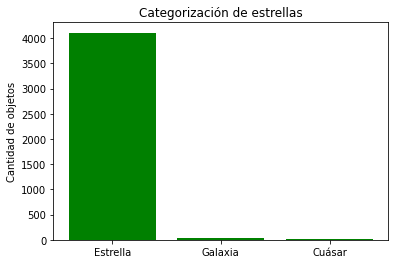

In [ ]:
plt.bar(['Estrella','Galaxia','Cuásar'],M[0],color='g')
plt.title('Categorización de estrellas')
plt.ylabel('Cantidad de objetos')
print(clf.score(X,Y))

Text(0, 0.5, 'Cantidad de objetos')

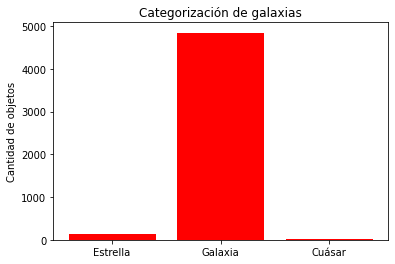

In [ ]:
plt.bar(['Estrella','Galaxia','Cuásar'],M[1],color='r')
plt.title('Categorización de galaxias')
plt.ylabel('Cantidad de objetos')


Text(0, 0.5, 'Cantidad de objetos')

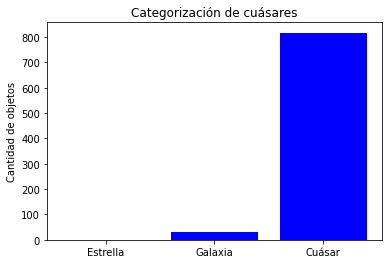

In [ ]:
plt.bar(['Estrella','Galaxia','Cuásar'],M[2],color='b')
plt.title('Categorización de cuásares')
plt.ylabel('Cantidad de objetos')

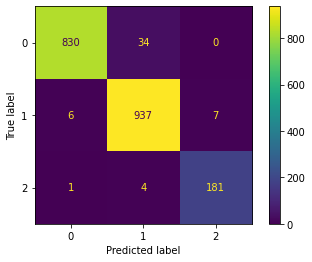

In [ ]:
#Son bastante menos porque lo demás se usó para entrenar el modelo
cm_2=confusion_matrix(clf.predict(X_test) ,Y_test, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=clf.classes_).plot()

In [ ]:
#Generamos una función que haga el modelo y nos entregue la matriz de confusión y la precisión

def Modelo_S(X,Y):
  
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  clf = KNeighborsClassifier()
  clf.fit(X_train, Y_train)
  accuracy = clf.score(X_test, Y_test)
  
  M=np.zeros((3,3))
  
  for i in range(3):
    for j in range(3):
      M[i][j]=len(Data.loc[(Data['class_n']==i )& (Data['k_v']==j)])


  return accuracy, M

#Hacemos el modelo 100 veces y que nos guarde los valores de los ínidices gini y la precisión
acc_s=np.zeros(100)
M_g=np.zeros((100,3))

for i in range(100):
  mod=Modelo_S(X,Y)
  acc_s[i]=mod[0]
  M_g[i]=gini(mod[1])



In [ ]:
#Nos entrega los promedios y desviación estándar
mean_gin=np.zeros(3)
std_gin=np.zeros(3)


for i in range(3):
  mean_gin[i]=np.mean(M_g[:,i])
  std_gin[i]=np.std(M_g[:,i])

mean_S=np.mean(acc_s)
std_S=np.std(acc_s)

print('El promedio de la precisión fue: '+ str(mean_S) + 'y la desviación estándar fue: '+str(std_S))

El promedio de la precisión fue: 0.9712500000000002y la desviación estándar fue: 0.0029159046623646683


In [ ]:
print('El promedio de los valores del gini fueron' + str(mean_gin) + 'y las desviaciones fueron: '+ str(std_gin))

El promedio de los valores del gini fueron[0.02005162 0.05986228 0.07472111]y las desviaciones fueron: [3.46944695e-18 6.93889390e-18 0.00000000e+00]


Lo cual parece que tiene overfitting, pienso en que, como casi no cambia el modelo supervisado, generar el modelo y hacer las curvas ROC, para ver el overfitting